# Supervised Learning with Python: Regularization

Regularization is an important concept in Machine Learning. We use this technique to avoid _overfitting_, especially when dealing with high number of features. 

I'll be investigating _Gapminder_ dataset and fit a Lasso/Ridge regression in this Notebook.

Outline:
* [Exploring the Data](Exploring-the-Data)
* [Lasso](Lasso)
* [Ridge](Ridge)

In [1]:
# Import necessary modules
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

## Exploring the Data

The dataset is seperated into two parts.
1. Independent variables (or features)
2. Response variable (or target)

Gapminder consists of 9 features or independent variables. The target or the response variable is **life expectancy** (life).

Exploratory Analysis for the Gapminder dataset can be found in another notebook. [>>>>](https://github.com/kaymal/Machine-Learning-with-Python/blob/master/Supervised%20Learning-Regression.ipynb)

In [4]:
# Create the DataFrame
df = pd.read_csv("datasets/gapminder.csv")

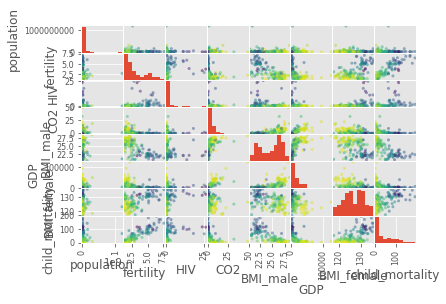

In [5]:
plt.style.use('ggplot')
pd.plotting.scatter_matrix(df.drop('life', axis = 1), c = y)
plt.show()

In [6]:
# Create dummy variables with dropping the first
df = pd.get_dummies(df, drop_first=True)

In [7]:
# Create features and target
X = df.drop('life', axis = 1).values # features (columns other than 'life')
y = df['life'].values # target

## Lasso

Lasso can be used as a tool for feature selection and thus for avoiding overfitting. Lasso uses  the $L1$ penalty to regularize.

In [7]:
# from sklearn.linear_model import Lasso

The parameter `alpha` controls model complexity. With a high alpha we may get an underfitted model, whereas with low alpha we may get an overfitted model. `alpha = 0` is equivalent to an ordinary least square.

If `normalize` parameter is True, "the regressors X will be normalized before regression by subtracting the mean and dividing by the l2-norm."

In [15]:
# Instantiate Lasso regressor
lasso = Lasso(alpha = 0.4, normalize = True)

# Fit the regressor
lasso.fit(X, y)

# Compute the coefficients
lasso_coef = lasso.coef_
print(lasso_coef)

[-0.         -0.         -0.          0.          0.          0.
 -0.         -0.07087587  0.          0.          0.          0.
 -0.        ]


We may plot the coefficients to see which variables are more significant.

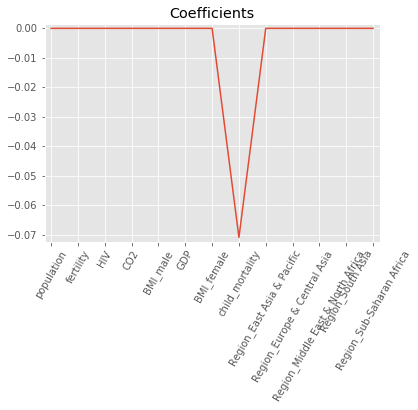

In [16]:
df_features = df.drop('life', axis = 1)

plt.plot(range(len(df_features.columns)), lasso_coef)
plt.xticks(range(len(df_features.columns)), df_features.columns.values, rotation=60)
plt.title('Coefficients')
plt.margins(0.02)
plt.show()

The graph shows us that "Child Mortality" is the most significant variable (for the case that we take `alpha=0.4`. It is worth mentioning that with different alpha values, we may get different results.

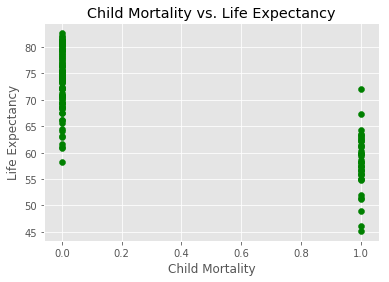

In [17]:
plt.scatter(X[:, -1], y, color = 'green')
plt.title('Child Mortality vs. Life Expectancy')
plt.xlabel('Child Mortality')
plt.ylabel('Life Expectancy')
plt.show()

In [18]:
lasso.score(X, y)

0.4948632173434634

## Ridge

Ridge is generally a better tool for building regression models. Ridge uses the $L2$ penalty to regulize.

In [19]:
# from sklearn.linear_model import Ridge
# from sklearn.model_selection import cross_val_score

In [20]:
# Create Alphas, and lists to store scores
alpha_space = np.logspace(-4, 0, 50)
ridge_scores = []
ridge_scores_std = []

I'll now compute the scores over range of 'alpha's and perform a 10-fold cross validation.

In [21]:
# Create a ridge regressor
ridge = Ridge(normalize = True)

# Compute scores over range of alphas
for alpha in alpha_space:
    
    # Specify alpha
    ridge.alpha = alpha
    
    # Perfrom 10-fold CV
    ridge_cv_scores = cross_val_score(ridge, X, y, cv=10)
    
    # Append the mean and std to the lists
    ridge_scores.append(np.mean(ridge_cv_scores))
    ridge_scores_std.append(np.std(ridge_cv_scores))

In [22]:
# Create a function to display how cv scores changes with alphas
def display_plot(cv_scores, cv_scores_std):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)

    std_error = cv_scores_std / np.sqrt(10)

    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    plt.show()

The plot below shows how the cross-val scores change with different alpha values.

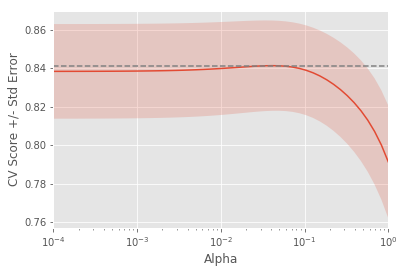

In [23]:
display_plot(ridge_scores, ridge_scores_std)